### Breadth-First Search

In [1]:
import numpy as np
import pandas as pd 
import random 
import time 
from collections import deque 
import matplotlib.pyplot as plt

### Step 1a - List each person according to their degree connection to the center node, named 'Jessi' in this case

In [4]:
center_node = "Jessi"

degree1 = ["Sheenagh", "Unice", "Vonda", "Alan", "Brandon"] 

degree2 = ["Norton", "Lake", "Adeon", "Jojo", "Richie", "Dixon", "Shell", "Leanora", 
"Darlene", "Bronte", "Omar", "Abbas", "Kelleigh", "Adelina"]

degree3 = ["Gaia", "Drew", "Maryanne", "Liza", "Millie", "Allan", "Raelyn", 
"Vern", "Kaolin", "Jayde", "Manny", "Bryson", "Gaila", "Wren", "Eleftherios", "Adriana", 
"Miracle", "Daffodil", "Pierce", "Gert", "Macy", "Paxton", "Acke", 
"Jemma", "Harding", "Jeanine", "Aiden", "Geffrey", "Madeline"] 

degree4 = ["Brice", "Eldon",  "Gerry",  "Kairo", "Emerentius", "Hrodpreht", "Marcellin", "Kerri", "Adrian", 
"Teofila", "Edith", "Kestas", "Slobodan", "Onufriy", "Hreidarr", "Aditya","Siri", "Makenzie", 
"Somhairle", "Diti", "Lalia", "Roar", "Christobel", "Emma", "Sarah", "Moises", "Frantzisca", "Guiscard", 
"Alice", "Charles", "Tatiana", "James", "Burim", "Franklin", "Andrea", 
"Waylon", "June", "Julie", "Ralph", "Rigoberto", "Abelino", 
"Milagros",  "Adelmo", "Valerie", "Hayleigh", "Tove", "Tobith", "Aila", "Akachi", "Dumuzi", "Heino"] 

degree5 = ["Narendra", "Valens", "Zlatko", "Flynn", "Chausiku", "Alva", "Vespasianus", 
"Quetzalcoatl", "Falk", "Mihovil", "Talmai", "Ojigkwanong", "Kishor", "Yeruslan", "Ishvi", "Cynthia", 
"Kasih", "Asa", "Prianju", "Sruthee", "Kgosi", "Kirsten", "Wilmer", "Achilles", "Rama", 
"Yama", "Esmond", "Navneet", "Anna", "Afua", "Archippe", "Arjuna", "Abel", "Albert", 
"Ariel", "Zephyr", "Olga", "Isidora", "Agatha", "Adora", "Wade", "Itziar", "Natividad", "Anisoara", 
"Febe", "Casey", "Vjekoslav", "Oluwatoyin", "Ada", "Adair", "Abbott", "Elzbieta", "Prasanna", 
"Gabriela", "Shyam", "Ailani", "Alfred", "Thomas", "Rick", "Lauro", "Javohir", "Tarik", "Polyxene", "Joost", 
"Krzesimir", "Frans", "Abraham", "Ajax", "Teodora", "Sneeha", "Acbar", "Adamaris"]

degree_groups = [degree1, degree2, degree3, degree4, degree5]

In [5]:
# check for duplicates
names_list = degree1 + degree2 + degree3 + degree4 + degree5
names_set = set(names_list)
print("No Duplicates? ", len(names_list) == len(names_set))

No Duplicates?  True


### Step 1b - Set up connections among the individuales in each node: 5 connections each to people in the next group

In [6]:
graph = {}

# first degree for Jessi 
graph[center_node] = degree1

random.seed(10)
for i in degree1:
    graph[i] = random.sample(degree2, k=5)
    
connections1 = []
for i in list(graph.keys()):
    if i in degree1:
        connections1.append(i)
for i in connections1:
    graph[i] = random.sample(degree2, k=5)
    
flat_list_values2 = [item for elem in list(graph.values()) for item in elem]
for i in flat_list_values2:
    if i in degree2:
        graph[i] = random.sample(degree3, k=5)

flat_list_values3 = [item for elem in list(graph.values()) for item in elem]
for i in flat_list_values3:
    if i in degree3:
        graph[i] = random.sample(degree4, k=5)

flat_list_values4 = [item for elem in list(graph.values()) for item in elem]
for i in flat_list_values4:
    if i in degree4:
        graph[i] = random.sample(degree5, k=5)

In [7]:
# check for duplicates in dictionary keys 
print("No Duplicates? ", len(list(graph.keys())) == len(set(graph.keys())))

No Duplicates?  True


In [8]:
# verification step 
print("Jessi's connections:", graph["Jessi"], '\n')
print("Norton's connections:", graph["Norton"], " and Norton is a 2nd degree connection")
print("Each of Norton's connections in 'degree3 group?'", ["yes" for i in graph["Norton"] if i in degree3], '\n')

print("Gerry's connections:", graph["Gerry"], " and Gerry is a 4th degree connection")
print("Each of Gerry's connections in 'degree5 group?'", ["yes" for i in graph["Gerry"] if i in degree5], '\n')

Jessi's connections: ['Sheenagh', 'Unice', 'Vonda', 'Alan', 'Brandon'] 

Norton's connections: ['Gaila', 'Geffrey', 'Adriana', 'Paxton', 'Madeline']  and Norton is a 2nd degree connection
Each of Norton's connections in 'degree3 group?' ['yes', 'yes', 'yes', 'yes', 'yes'] 

Gerry's connections: ['Mihovil', 'Agatha', 'Alva', 'Prasanna', 'Oluwatoyin']  and Gerry is a 4th degree connection
Each of Gerry's connections in 'degree5 group?' ['yes', 'yes', 'yes', 'yes', 'yes'] 



### Step 1c - Graph of first and second degree connections 

Note that this was not really part of this assignment but a graph of the initial connections made it much easier for me to understand the structure of the relationships and corresponding degrees.  The graph shown here does not show direction but for purposes of our search we will be searching outward.

In [13]:
import networkx as nx

sub_graph = {}

# first degree for Jessi 
sub_graph[center_node] = degree1

random.seed(10)
for i in degree1:
    sub_graph[i] = random.sample(degree2, k=5)

graph1 = nx.Graph(sub_graph)
degree1to2 = degree1 + degree2
graph1.add_nodes_from(degree1to2)

color_map = []
for node in sub_graph:
    color_map.append('red')
a = ['skyblue']
color_map = color_map + a*(len(graph1)-len(color_map))

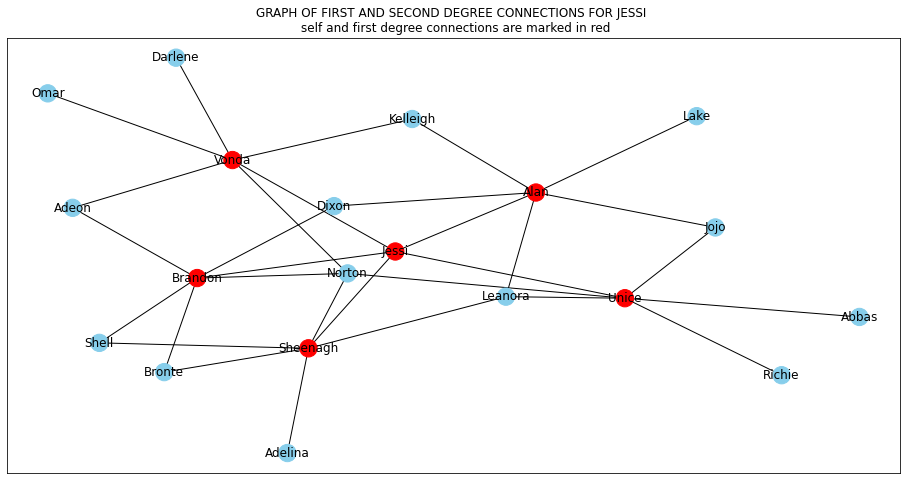

In [14]:
plt.figure(figsize=(16, 8))
pos = nx.spring_layout(graph1)
nx.draw_networkx(graph1, pos, node_color=color_map, arrowsize=20)
plt.title('GRAPH OF FIRST AND SECOND DEGREE CONNECTIONS FOR JESSI \n self and first degree connections are \
marked in red')
plt.show()

### Step 2 - Set up Breadth First Search Algorithm

In this case we will search for individuals whose first name starts with the letter 'A'

In [15]:
def person_name_A(name):
    return name[0] == 'A'

In [16]:
def search(name):
    search_queue = deque()
    search_queue += graph[name]
    
    searched = []
    
    while search_queue:
        
        print("search_queue now looks like this:", search_queue)
        
        person = search_queue.popleft()
        print(person)
        
        if person not in searched:
            
            print("Searching", person)
            
            if person_name_A(person):
                print(name, "is a connected to", person, "whose name starts with 'A'")
                return True
            else:
                # first step is if degree 5 then finish searching the search_queue 
                if person in degree5:
                    for i in search_queue:
                        if person_name_A(person):
                            print(name, "is a connected to", person, "whose name starts with 'A'")
                            break
                else:
                    search_queue += graph[person]
                    print(person, "does not start with the letter 'A'")
                    
                    searched.append(person)
                    print("Finished searching", person)
    return False

In [21]:
search_times = {}
degrees = [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4]
search_list = ['Vonda', 'Alan', 'Brandon', 'Leanora', 'Adelina', 'Jojo', 'Aiden', 'Daffodil', 'Pierce', 
               'Guiscard', 'Dumuzi', 'Kairo']
for i in search_list:
    start_time = time.perf_counter()
    search(i);
    end_time = time.perf_counter()
    time_elapsed = round((end_time - start_time)*1000,6)
    search_times[i] = time_elapsed

In [18]:
df0 = pd.DataFrame(search_times, index=[0])
df1 = df0.T
df1.columns = ['Search Time (miliseconds)']
df1['Degree Connection to Central Node'] = degrees

### Step 3 - Table with Search Times

In [19]:
df1

,Search Time (miliseconds),Degree Connection to Central Node
Vonda,0.487913,1
Alan,1.736081,1
Brandon,0.179430,1
Leanora,0.464910,2
Adelina,0.544514,2
Jojo,0.075233,2
Aiden,1.419507,3
Daffodil,1.039209,3
Pierce,1.070595,3
Guiscard,0.223350,4


### Step 4 - Visualization

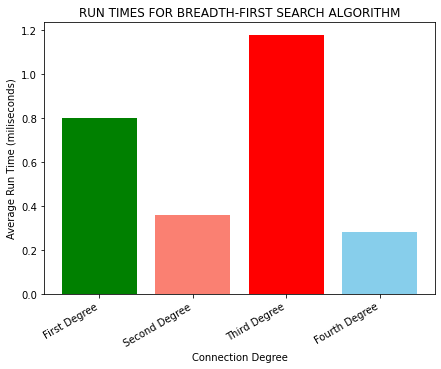

In [23]:
averages = [np.mean(df1['Search Time (miliseconds)'][0:3]), np.mean(df1['Search Time (miliseconds)'][3:6]), 
            np.mean(df1['Search Time (miliseconds)'][6:9]), np.mean(df1['Search Time (miliseconds)'][9:12])]
groups = ['First Degree', 'Second Degree', 'Third Degree', 'Fourth Degree']

fig, ax = plt.subplots(figsize=(7, 5))

ax.bar(groups, averages, color=['green', 'salmon', 'red', 'skyblue'])

plt.xticks(rotation=30, ha="right")
ax.set_xlabel('Connection Degree')
ax.set_ylabel('Average Run Time (miliseconds)')

plt.title("RUN TIMES FOR BREADTH-FIRST SEARCH ALGORITHM");

### Summary

In the bar graph above we can see that the average run time for the first and third degree connections was higher than the second and fourth degree connections.  This is mainly a function of some of the first and third degree connections having to search beyond their immediate connections and go to their "connection's connections".  Since the Breadth-First Search algorithm has a Big O notation that is directly related the number of nodes (individuals in this case) and edges searched, some individuals had to search relatively far to find a connection with a name starting with the letter 'A'.  In real-life network examples there may be instances like this one where search times vary considerably due to the presence or lack of certain nodes in a network.  For example if we search among professionals who know an attorney, there may be individuals with an immediate connection to an attorney and others with a more distance connection.  